# Problem Statement

**PROJECTO 1** <br>
**Análisis exploratorio y modelado predictivo de precios de viviendas en Barcelona usando Python y SQL**

## Objective
Desarrollar un análisis completo y un modelo predictivo para los precios de viviendas en Barcelona, utilizando datos extraídos del portal Fotocasa. El objetivo es aplicar técnicas de extracción, manipulación y análisis de datos, así como algoritmos de Machine Learning, para predecir los precios de las viviendas en función de diversas características.

## Data Description
- **price**: The price of the real-state.
- **rooms**: Number of rooms.
- **bathroom**: Number of bathrooms.
- **lift**: whether a building has an elevator (also known as a lift in some regions) or not
- **terrace**: If it has a terrace or not.
- **square_meters**: Number of square meters.
- **real_state**: Kind of real-state.
- **neighborhood**: Neighborhood
- **square_meters_price**: Price of the square meter.

## Importing necessary libraries

In [1]:
import pandas as pd

## Loading the Dataset

In [2]:
df=pd.read_csv('Barcelona_Fotocasa_HousingPrices.csv')

In [8]:
df.head()

,Unnamed: 0,price,rooms,bathroom,lift,terrace,square_meters,real_state,neighborhood,square_meters_price
0,0,750,3,1,True,False,60,flat,Horta- Guinardo,12.500000
1,1,770,2,1,True,False,59,flat,Sant Andreu,13.050847
2,2,1300,1,1,True,True,30,flat,Gràcia,43.333333
3,3,2800,1,1,True,True,70,flat,Ciutat Vella,40.000000
4,4,720,2,1,True,False,44,flat,Sant Andreu,16.363636


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8188 entries, 0 to 8187
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           8188 non-null   int64  
 1   price                8188 non-null   int64  
 2   rooms                8188 non-null   int64  
 3   bathroom             8188 non-null   int64  
 4   lift                 8188 non-null   bool   
 5   terrace              8188 non-null   bool   
 6   square_meters        8188 non-null   int64  
 7   real_state           7920 non-null   object 
 8   neighborhood         8188 non-null   object 
 9   square_meters_price  8188 non-null   float64
dtypes: bool(2), float64(1), int64(5), object(2)
memory usage: 527.9+ KB


In [11]:
df.describe()

,Unnamed: 0,price,rooms,bathroom,square_meters,square_meters_price
count,8188.000000,8188.000000,8188.000000,8188.000000,8188.000000,8188.000000
mean,4093.500000,1444.092574,2.420738,1.508793,84.610161,17.739121
std,2363.816335,1125.886215,1.138592,0.732798,47.874028,9.245241
min,0.000000,320.000000,0.000000,1.000000,10.000000,4.910714
25%,2046.750000,875.000000,2.000000,1.000000,56.000000,12.790698
50%,4093.500000,1100.000000,2.000000,1.000000,73.000000,15.306122
75%,6140.250000,1540.000000,3.000000,2.000000,95.000000,19.444444
max,8187.000000,15000.000000,10.000000,8.000000,679.000000,186.666667


## Data Overview

## Consolidated notes on Data Overview

# Exploratory Data Analysis (EDA)

## EDA Functions

#### DATA CLEANING

In [12]:
# Info about columns and nulls
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8188 entries, 0 to 8187
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           8188 non-null   int64  
 1   price                8188 non-null   int64  
 2   rooms                8188 non-null   int64  
 3   bathroom             8188 non-null   int64  
 4   lift                 8188 non-null   bool   
 5   terrace              8188 non-null   bool   
 6   square_meters        8188 non-null   int64  
 7   real_state           7920 non-null   object 
 8   neighborhood         8188 non-null   object 
 9   square_meters_price  8188 non-null   float64
dtypes: bool(2), float64(1), int64(5), object(2)
memory usage: 527.9+ KB


Unnamed: 0               0
price                    0
rooms                    0
bathroom                 0
lift                     0
terrace                  0
square_meters            0
real_state             268
neighborhood             0
square_meters_price      0
dtype: int64

MODIFICAMOS LOS **VALORES NULOS**

In [17]:
df.real_state.value_counts()

real_state
flat         6505
apartment     991
attic         315
study         109
Name: count, dtype: int64

In [18]:
# Modificamos los nulos por 'unknown' ya que es una información relevante.
df['real_state'].fillna('unknown', inplace=True)

In [20]:
df['real_state'].value_counts()

real_state
flat         6505
apartment     991
attic         315
unknown       268
study         109
Name: count, dtype: int64

REVISIÓN Y CORRECCIÓN DE ELEMENTOS DUPLICADOS

In [21]:
df.duplicated().sum()

0

VISUALIZACIÓN DE LAS DISTRIBUCIONES

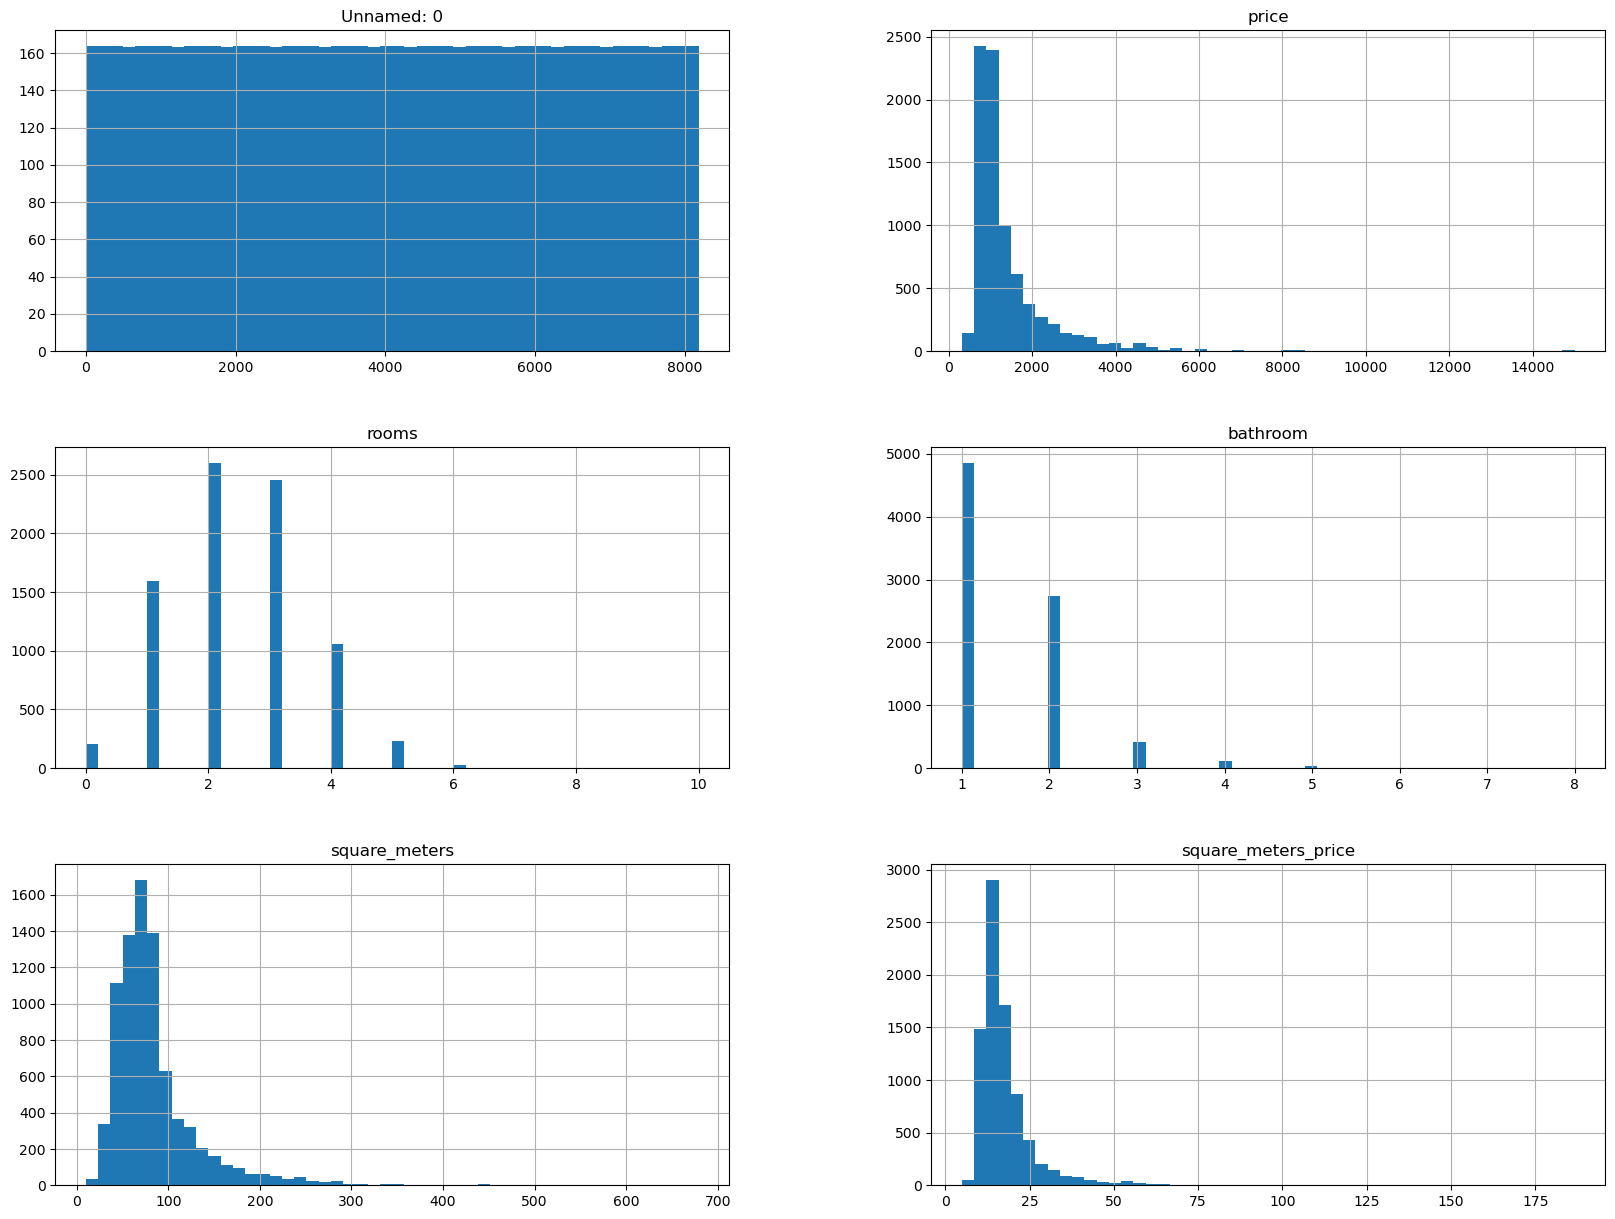

In [22]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()